# Ejercicio SVM datos Eurocopa 2012
A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

## 1. Importa las librerias necesarias

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
#import plotly.express as px
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR, SVC

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

## 2. Carga los datos

In [3]:
df = pd.read_csv("data/Euro_2012_stats_TEAM.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

## 3. Obtener la matriz de correlación con TODAS las variables. ¿Hay algunas columnas que estén muy correlacionadas?

In [4]:
df[df.dtypes[df.dtypes == "object"].index].head()

,Team,Shooting Accuracy,% Goals-to-shots,Passing Accuracy,Saves-to-shots ratio
0,Croatia,51.9%,16.0%,76.9%,81.3%
1,Czech Republic,41.9%,12.9%,78.1%,60.1%
2,Denmark,50.0%,20.0%,83.3%,66.7%
3,England,50.0%,17.2%,80.6%,88.1%
4,France,37.9%,6.5%,87.2%,54.6%


In [5]:
# Para poder seguir trabajando con este dataset, lo primero es convertir estas columnas a numéricas
df.Team.unique()

array(['Croatia', 'Czech Republic', 'Denmark', 'England', 'France',
       'Germany', 'Greece', 'Italy', 'Netherlands', 'Poland', 'Portugal',
       'Republic of Ireland', 'Russia', 'Spain', 'Sweden', 'Ukraine'],
      dtype=object)

In [6]:
le = LabelEncoder()
df["Team"] = le.fit_transform(df["Team"])

In [7]:
col_obj_col = df[df.dtypes[df.dtypes == "object"].index].columns.tolist()
print(f"Los valores de las columnas {col_obj_col[0]}, {col_obj_col[1]}, {col_obj_col[2]} y {col_obj_col[3]} siguen\nsiendo de tipo object ya que sus valores contienen el elemento '%'")

Los valores de las columnas Shooting Accuracy, % Goals-to-shots, Passing Accuracy y Saves-to-shots ratio siguen
siendo de tipo object ya que sus valores contienen el elemento '%'


In [8]:
for col in col_obj_col:    
    df[col] = df[col].apply(lambda x: float(x[:-1]))

In [9]:
df.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,0,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
1,1,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,2,4,10,10,50.0,20.0,27,1,0,0,...,10,66.7,25,38,8,4,0,7,7,15
3,3,5,11,18,50.0,17.2,40,0,0,0,...,22,88.1,43,45,6,5,0,11,11,16
4,4,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     int32  
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     float64
 5   % Goals-to-shots            16 non-null     float64
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

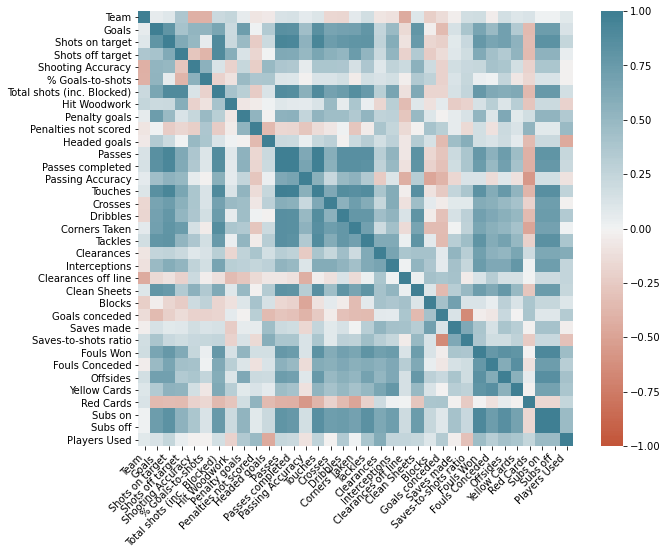

In [11]:
corr_matrix = df.corr()

plt.subplots(figsize=(10, 8))

#sns.heatmap(corr_matrix, cmap = "PiYG", square=True)

ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
corr_abs = np.abs(df.corr())
correlation_df = corr_abs[(corr_abs > 0.95) & (corr_abs < 1)]
more_correlated = [column for column in correlation_df.notna().columns if any(correlation_df.notna()[column] == True)]
print("Las siguientes columnas presentan una correlación mayor del 95% con cualquier otra columna del dataframe:\n",more_correlated)

Las siguientes columnas presentan una correlación mayor del 95% con cualquier otra columna del dataframe:
 ['Passes', 'Passes completed', 'Touches']


## 4. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

In [13]:
print(f"La correlación entre ambas columnas es del {round((df['Shooting Accuracy'].corr(df['Goals']))*100, 2)}%")

La correlación entre ambas columnas es del 52.12%


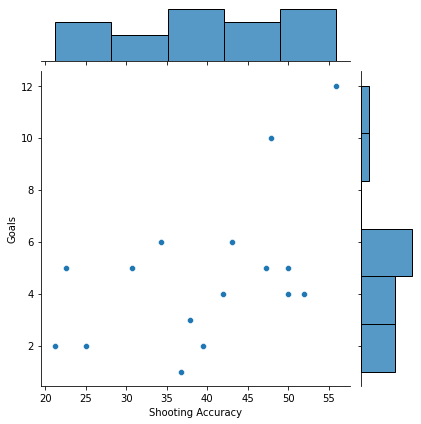

In [14]:
sns.jointplot(x = "Shooting Accuracy", y= "Goals", data = df)

In [15]:
dictionary_model_reg = {"poly_model": Pipeline([("polynomial_features", PolynomialFeatures(10)),
                                                ("linear_regression", LinearRegression())]),
                        "linear_model": LinearRegression(),
                        "support_model": SVR()
                       }


X = np.array(df["Shooting Accuracy"]).reshape(-1,1)
y = df.Goals

In [21]:
df[["Shooting Accuracy"]]

,Shooting Accuracy
0,51.9
1,41.9
2,50.0
3,50.0
4,37.9
5,47.8
6,30.7
7,43.0
8,25.0
9,39.4


In [22]:
def train_model_reg(dict_model, X, y):
    dict_scores = {"model":[], "score":[]}
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
    print(X_train.shape, y_train.shape)
    
    for k,v in dict_model.items():         
        v.fit(X_train, y_train)
        y_pred = v.predict(X_train)

        score = r2_score(y_train, y_pred)
   
        lista_val = [k, score]
        for i,e in enumerate(["model", "score"]):
            dict_scores[e].append(lista_val[i])

        X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
        plt.scatter(X_train_to_show, y_train_to_show, color='lightblue')
        X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
        plt.plot(X_train_to_show, y_pred, color='blue')
        plt.title(f"{k}")
        plt.show()
        
    return pd.DataFrame(dict_scores)

(12, 1) (12,)


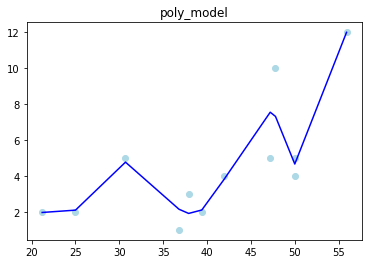

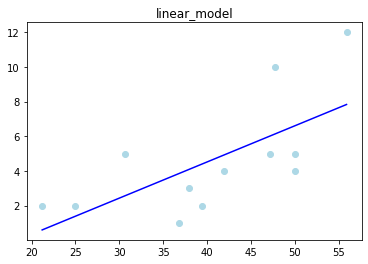

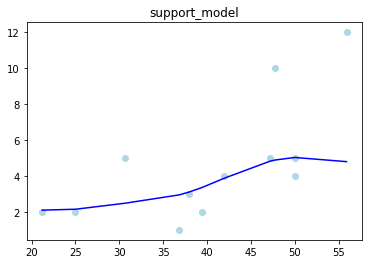

,model,score
0,poly_model,0.860425
1,linear_model,0.448658
2,support_model,0.247261


In [23]:
train_model_reg(dict_model=dictionary_model_reg, X=X, y=y)

## 5. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [24]:
cat_type = CategoricalDtype(categories=[1,2,3,4,5,6,10,12],
                            ordered=True)

df.Goals = df.Goals.astype(cat_type)

In [25]:
df.Goals.dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 10, 12], ordered=True)

In [26]:
dictionary_model_class = {"randomforest_model": RandomForestClassifier(),
                    "log_model": LogisticRegression(),
                    "support_model": SVC()
                   }

X = df[['% Goals-to-shots','Total shots (inc. Blocked)','Corners Taken','Passes','Dribbles']]
y = df.Goals

In [27]:
def train_model_class(dict_model, X, y, X_pred):
    dict_pred = {"model":[], "prediction":[]}
    
    for k,v in dict_model.items():         
        v.fit(X, y)
        y_pred = v.predict(X_pred.reshape(1,-1))
   
        lista_val = [k, y_pred[0]]
        for i,e in enumerate(["model", "prediction"]):
            dict_pred[e].append(lista_val[i])
            
    return pd.DataFrame(dict_pred)

In [28]:
X_pred = np.array([40.0,102.0,5.0,82.0,23.0])

In [29]:
train_model_class(dict_model=dictionary_model_class, X=X, y=y, X_pred=X_pred)

,model,prediction
0,randomforest_model,5
1,log_model,6
2,support_model,5
